https://dacon.io/competitions/open/235536/data

In [606]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [607]:
!head movies_train.csv

title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211
길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,,0,32,5,53526
회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523
"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,,0,3,5,4778


In [608]:
df = pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# train 데이터

## 불필요 컬럼 삭제

In [610]:
df.drop(columns=["title", "time", "release_time", 'director'], inplace=True)

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


## 결측치 처리

In [612]:
df.fillna(0, inplace=True)

In [613]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [614]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387


## 카테고리 컬럼 인코딩

### distributor

In [615]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

### genre

In [689]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

AttributeError: ignored

### screening_rat

In [617]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
dtypes: category(3), float64(1), int16(1), int64(4), int8(2)
memory usage: 35.2 KB


In [619]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387,96,11,1


## shuffle

In [620]:
df = df.sample(frac=1).reset_index(drop=True)

In [621]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,(주)NEW,드라마,15세 관람가,0.0,0,311,5,11374879,6,4,1
1,CJ 엔터테인먼트,SF,15세 관람가,522925.0,3,367,4,828029,51,0,1
2,THE 픽쳐스,다큐멘터리,전체 관람가,0.0,0,1,4,42337,61,3,2
3,(주)키노아이,드라마,15세 관람가,0.0,0,17,2,256,36,4,1
4,위더스필름,드라마,12세 관람가,0.0,0,65,3,90,130,4,0


## log 스케일 변환
```
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
```


값이 0인 컬럼은 log변환할때 에러 발생한다.

numpy.log1p()를 사용하여 값에 1을 더한후 log 변환해 준다.

In [622]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 4   dir_prev_num        600 non-null    int64   
 5   num_staff           600 non-null    int64   
 6   num_actor           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
 8   distributor_code    600 non-null    int16   
 9   genre_code          600 non-null    int8    
 10  screening_rat_code  600 non-null    int8    
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 49.2 KB


## Standardization
```
 4   dir_prev_num        600 non-null    int64   
 6   num_actor           600 non-null    int64   
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
 ```

In [624]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = ( df.dir_prev_num - df.dir_prev_num.mean() ) / df.dir_prev_num.std()
df['num_actor'] = ( df.num_actor - df.num_actor.mean() ) / df.num_actor.std()
df['dir_prev_bfnum_log'] = ( df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean() ) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = ( df.num_staff_log - df.num_staff_log.mean() ) / df.num_staff_log.std()
# df['box_off_num_log'] = ( df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

## 데이터 분포 보기

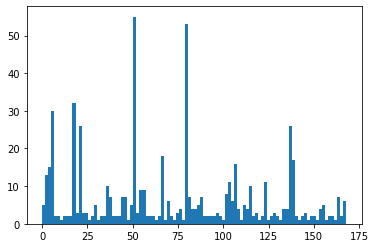

In [625]:
plt.hist(df.distributor_code.to_numpy(), bins=100)
plt.show()

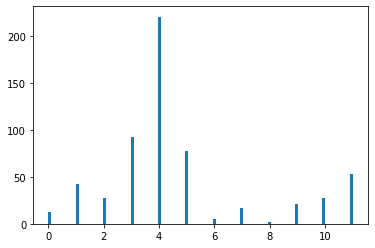

In [626]:
plt.hist(df.genre_code.to_numpy(), bins=100)
plt.show()

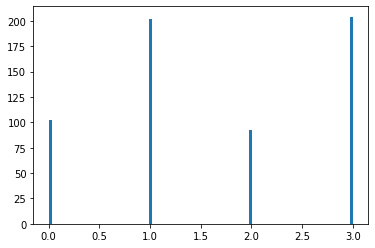

In [627]:
plt.hist(df.screening_rat_code.to_numpy(), bins=100)
plt.show()

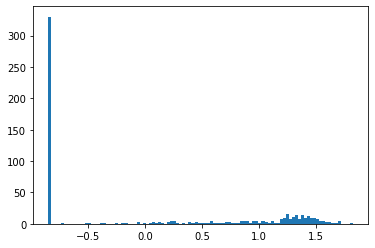

In [628]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

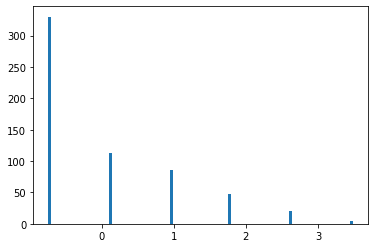

In [629]:
plt.hist(df.dir_prev_num.to_numpy(), bins=100)
plt.show()

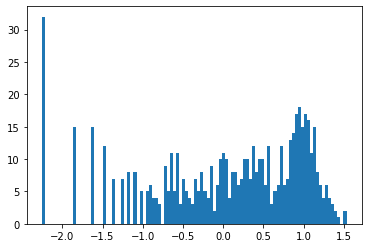

In [630]:
plt.hist(df.num_staff_log.to_numpy(), bins=100)
plt.show()

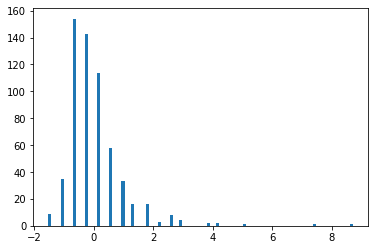

In [631]:
plt.hist(df.num_actor.to_numpy(), bins=100)
plt.show()

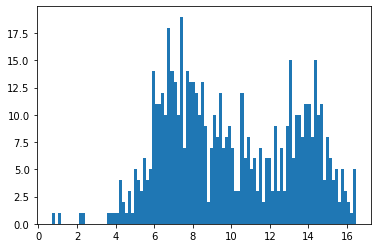

In [632]:
plt.hist(df.box_off_num_log.to_numpy(), bins=100)
plt.show()

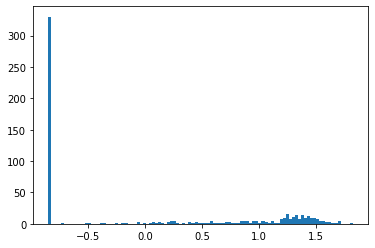

In [633]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

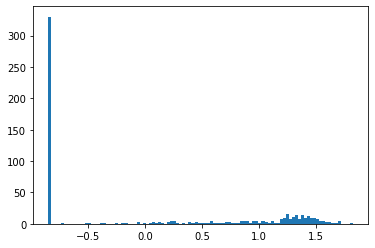

In [634]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

## one-hot encoding
```
distributor_code
genre_code
screening_rat_code
```
reference : https://blog.naver.com/PostView.nhn?blogId=esak97&logNo=221715216490

In [635]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 196 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(185)
memory usage: 155.3 KB


## 불필요 컬럼 삭제
```
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64     
```

In [637]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

TODO
- ~~log 스케일 변환~~
- ~~카테고리 코드를 one-hot 인코딩~~
- ~~불필요 컬럼 삭제~~
- ~~shuffle~~
- ~~numpy 변환~~
- ~~x,y 나누기~~
- standardization
- ~~train, test 나누기~~


## x, y numpy로

In [638]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)

x = df.to_numpy()

In [639]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


## train/test 분리

In [640]:
i = int(len(x)*0.8)
train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

# 딥러닝 학습

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                1900      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


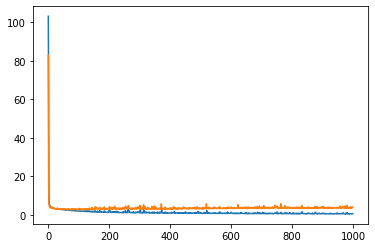

4/4 [==============================] - 0s 3ms/step - loss: 5.6596 - mape: 23.9474 - root_mean_squared_error: 2.3790
loss= 5.659605026245117
mape= 23.947376251220703
rmse= 2.3789925575256348


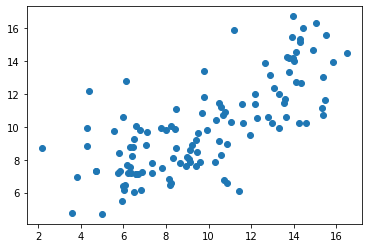

In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

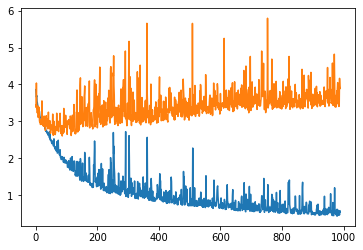

In [654]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.show()

In [655]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
result_rmse = rmse(predicted, org_test_y)
print(result_rmse)

tf.Tensor(2630238.2, shape=(), dtype=float32)


# Test 데이타

In [698]:
train_df = pd.read_csv("movies_train.csv")

In [699]:
df = pd.read_csv("movies_test.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [700]:
train_data_count = len(train_df)
test_data_count = len(df)

print(train_data_count)
print(test_data_count)

600
243


In [701]:
df = pd.concat([train_df, df])

In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## dummy y 컬럼 추가

In [703]:
df['box_off_num'] = df.dir_prev_num

## 불필요 컬럼 삭제

In [704]:
df.drop(columns=["title", "time", "release_time", 'director'], inplace=True)

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   screening_rat   843 non-null    object 
 3   dir_prev_bfnum  377 non-null    float64
 4   dir_prev_num    843 non-null    int64  
 5   num_staff       843 non-null    int64  
 6   num_actor       843 non-null    int64  
 7   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 59.3+ KB


## 결측치 처리

In [706]:
df.fillna(0, inplace=True)

In [707]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   screening_rat   843 non-null    object 
 3   dir_prev_bfnum  843 non-null    float64
 4   dir_prev_num    843 non-null    int64  
 5   num_staff       843 non-null    int64  
 6   num_actor       843 non-null    int64  
 7   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 59.3+ KB


In [708]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,0
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,2
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,4
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,1


## 카테고리 컬럼 인코딩

### distributor

In [709]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

### genre

In [710]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

### screening_rat

In [711]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         843 non-null    category
 1   genre               843 non-null    category
 2   screening_rat       843 non-null    category
 3   dir_prev_bfnum      843 non-null    float64 
 4   dir_prev_num        843 non-null    int64   
 5   num_staff           843 non-null    int64   
 6   num_actor           843 non-null    int64   
 7   box_off_num         843 non-null    int64   
 8   distributor_code    843 non-null    int16   
 9   genre_code          843 non-null    int8    
 10  screening_rat_code  843 non-null    int8    
dtypes: category(3), float64(1), int16(1), int64(4), int8(2)
memory usage: 58.3 KB


In [713]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,0,97,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,2,27,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,4,27,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,2,7,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,1,122,11,1


## shuffle

In [714]:
# df = df.sample(frac=1).reset_index(drop=True)

In [715]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,0,97,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,2,27,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,4,27,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,2,7,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,1,122,11,1


## log 스케일 변환
```
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64   
 7   box_off_num         600 non-null    int64   
```


값이 0인 컬럼은 log변환할때 에러 발생한다.

numpy.log1p()를 사용하여 값에 1을 더한후 log 변환해 준다.

In [716]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   distributor         843 non-null    category
 1   genre               843 non-null    category
 2   screening_rat       843 non-null    category
 3   dir_prev_bfnum      843 non-null    float64 
 4   dir_prev_num        843 non-null    int64   
 5   num_staff           843 non-null    int64   
 6   num_actor           843 non-null    int64   
 7   box_off_num         843 non-null    int64   
 8   distributor_code    843 non-null    int16   
 9   genre_code          843 non-null    int8    
 10  screening_rat_code  843 non-null    int8    
 11  dir_prev_bfnum_log  843 non-null    float64 
 12  num_staff_log       843 non-null    float64 
 13  box_off_num_log     843 non-null    float64 
dtypes: category(3), float64(4), int16(1), int64(4), int8(2)
memory usage: 78.0 KB


## Standardization
```
 4   dir_prev_num        600 non-null    int64   
 6   num_actor           600 non-null    int64   
 11  dir_prev_bfnum_log  600 non-null    float64 
 12  num_staff_log       600 non-null    float64 
 13  box_off_num_log     600 non-null    float64 
 ```

In [718]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = ( df.dir_prev_num - df.dir_prev_num.mean() ) / df.dir_prev_num.std()
df['num_actor'] = ( df.num_actor - df.num_actor.mean() ) / df.num_actor.std()
df['dir_prev_bfnum_log'] = ( df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean() ) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = ( df.num_staff_log - df.num_staff_log.mean() ) / df.num_staff_log.std()
# df['box_off_num_log'] = ( df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

## 데이터 분포 보기

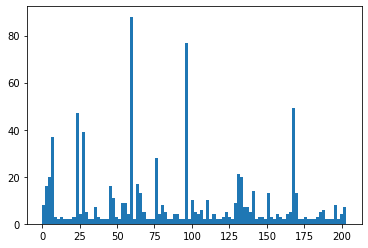

In [719]:
plt.hist(df.distributor_code.to_numpy(), bins=100)
plt.show()

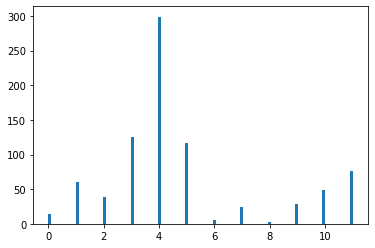

In [720]:
plt.hist(df.genre_code.to_numpy(), bins=100)
plt.show()

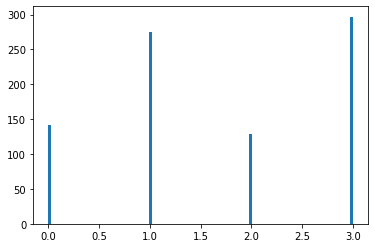

In [721]:
plt.hist(df.screening_rat_code.to_numpy(), bins=100)
plt.show()

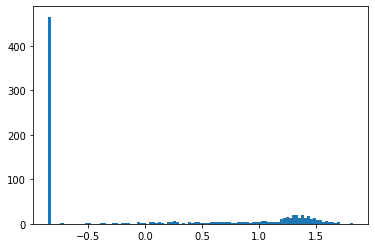

In [722]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

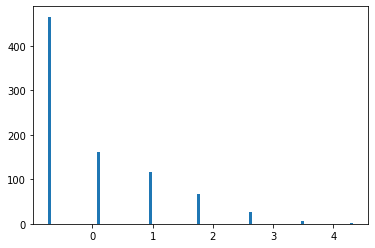

In [723]:
plt.hist(df.dir_prev_num.to_numpy(), bins=100)
plt.show()

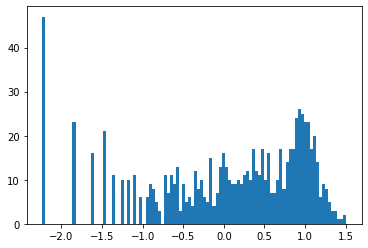

In [724]:
plt.hist(df.num_staff_log.to_numpy(), bins=100)
plt.show()

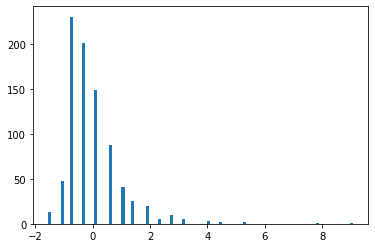

In [725]:
plt.hist(df.num_actor.to_numpy(), bins=100)
plt.show()

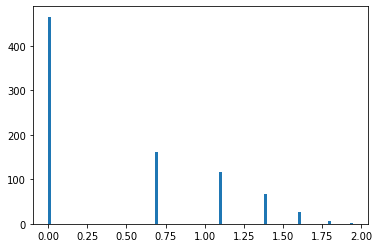

In [726]:
plt.hist(df.box_off_num_log.to_numpy(), bins=100)
plt.show()

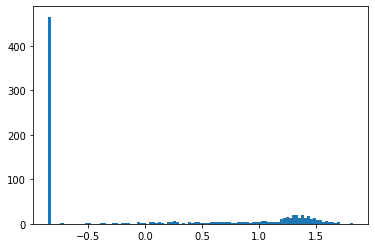

In [727]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

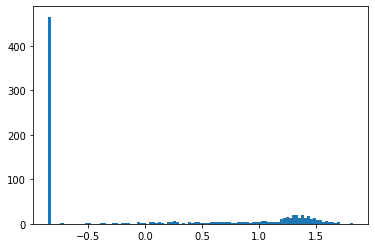

In [728]:
plt.hist(df.dir_prev_bfnum_log.to_numpy(), bins=100)
plt.show()

## one-hot encoding
```
distributor_code
genre_code
screening_rat_code
```
reference : https://blog.naver.com/PostView.nhn?blogId=esak97&logNo=221715216490

In [729]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 231 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(220)
memory usage: 255.9 KB


## 불필요 컬럼 삭제
```
 0   distributor         600 non-null    category
 1   genre               600 non-null    category
 2   screening_rat       600 non-null    category
 3   dir_prev_bfnum      600 non-null    float64 
 5   num_staff           600 non-null    int64     
```

In [731]:
df.drop(columns=["distributor", 
                 "genre", 
                 "screening_rat", 
                 "dir_prev_bfnum", 
                 "num_staff"], inplace=True)

## x, y numpy로

In [732]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num', 'box_off_num_log'], inplace=True)

x = df.to_numpy()

In [733]:
print(x.shape)
print(y.shape)

(843, 224)
(843,)


# 예측

In [694]:
 test_x = x

In [695]:
y_ = model.predict(test_x)
predicted = np.exp(y)


ValueError: ignored

In [696]:
!head -3 movies_train.csv
!head -3 movies_test.csv

title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.0,2,304,3
아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25,4,275,3
